In [16]:
squareSize = 30;

% Create a set of calibration images
leftImages = imageDatastore(fullfile(pwd, 'calibration-data', 'cam1-img'));
rightImages = imageDatastore(fullfile(pwd, 'calibration-data', 'cam2-img'));

leftImageFileNames = leftImages.Files;
rightImageFileNames = rightImages.Files;

% Detect the calibration pattern
[leftImagePoints, boardSize, leftImagesUsed] = detectCheckerboardPoints(leftImageFileNames);
[rightImagePoints, boardSize, rightImagesUsed] = detectCheckerboardPoints(rightImageFileNames);

leftWorldPoints = generateCheckerboardPoints(boardSize, squareSize);
rightWorldPoints = generateCheckerboardPoints(boardSize, squareSize);

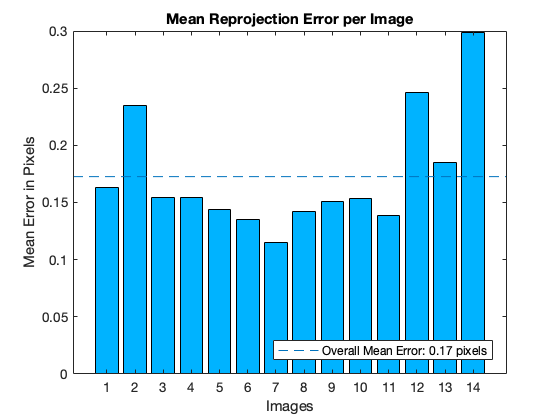

In [17]:
imageSize = [480, 640];

[leftCamParams, ~, leftEstimationErrors] = estimateCameraParameters(leftImagePoints, ...
                            leftWorldPoints, 'ImageSize', imageSize); 

showReprojectionErrors(leftCamParams);

In [3]:
disp(leftCamParams);
displayErrors(leftEstimationErrors, leftCamParams);

  cameraParameters with properties:

   Camera Intrinsics
                    IntrinsicMatrix: [3x3 double]
                        FocalLength: [592.4308 592.3361]
                     PrincipalPoint: [332.1525 240.6543]
                               Skew: 0
                   RadialDistortion: [-0.1434 1.2597]
               TangentialDistortion: [0 0]
                          ImageSize: [480 640]

   Camera Extrinsics
                   RotationMatrices: [3x3x14 double]
                 TranslationVectors: [14x3 double]

   Accuracy of Estimation
              MeanReprojectionError: 0.1726
                 ReprojectionErrors: [48x2x14 double]
                  ReprojectedPoints: [48x2x14 double]

   Calibration Settings
                        NumPatterns: 14
                        WorldPoints: [48x2 double]
                         WorldUnits: 'mm'
                       EstimateSkew: 0
    NumRadialDistortionCoefficients: 2
       EstimateTangentialDistortion: 0


			Standard E

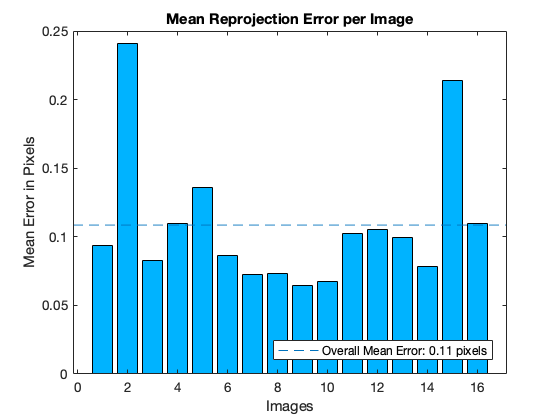

In [18]:
[rightCamParams, ~, rightEstimationErrors] = estimateCameraParameters(rightImagePoints, ...
                        rightWorldPoints,'ImageSize', imageSize); 

showReprojectionErrors(rightCamParams);

In [5]:
disp(rightCamParams);
displayErrors(rightEstimationErrors, rightCamParams);

  cameraParameters with properties:

   Camera Intrinsics
                    IntrinsicMatrix: [3x3 double]
                        FocalLength: [765.9533 766.0403]
                     PrincipalPoint: [261.7392 224.1293]
                               Skew: 0
                   RadialDistortion: [-0.0688 0.0923]
               TangentialDistortion: [0 0]
                          ImageSize: [480 640]

   Camera Extrinsics
                   RotationMatrices: [3x3x16 double]
                 TranslationVectors: [16x3 double]

   Accuracy of Estimation
              MeanReprojectionError: 0.1086
                 ReprojectionErrors: [48x2x16 double]
                  ReprojectedPoints: [48x2x16 double]

   Calibration Settings
                        NumPatterns: 16
                        WorldPoints: [48x2 double]
                         WorldUnits: 'mm'
                       EstimateSkew: 0
    NumRadialDistortionCoefficients: 2
       EstimateTangentialDistortion: 0


			Standard E

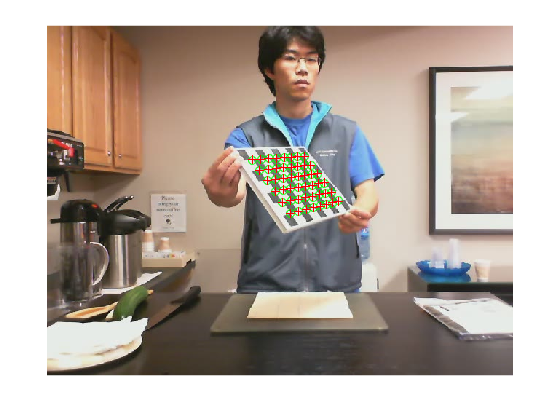

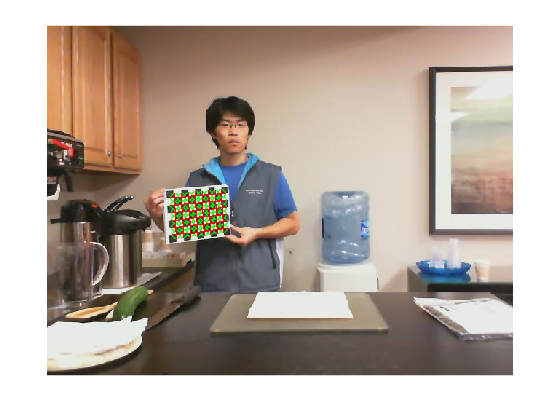

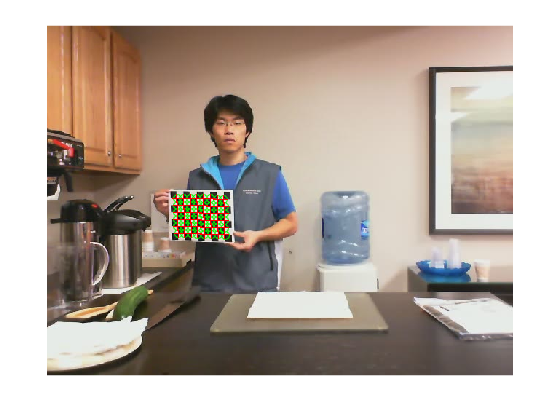

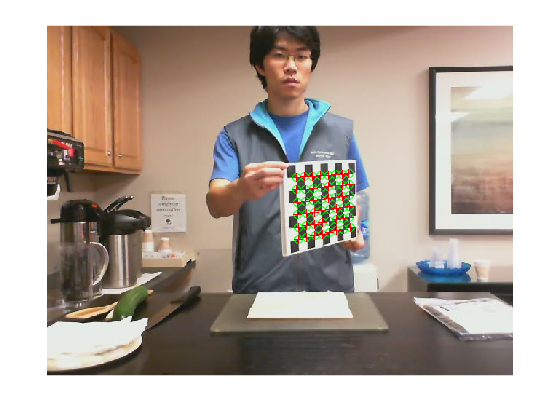

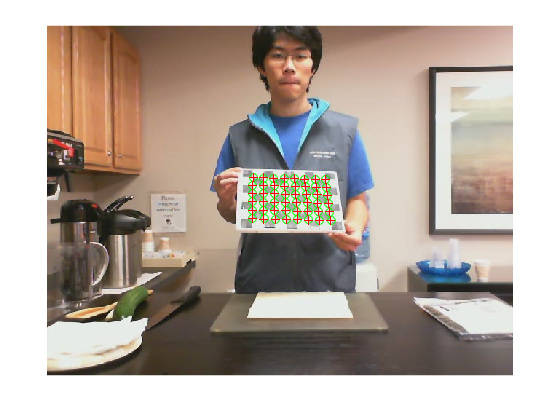

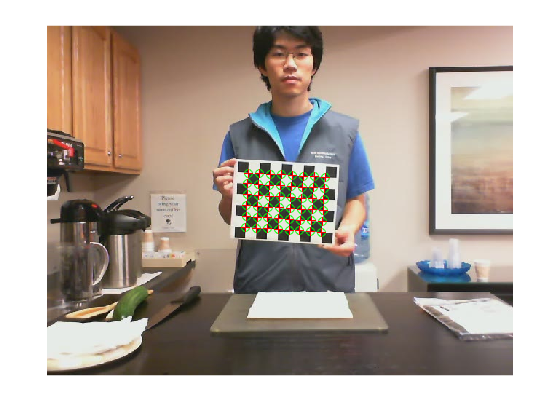

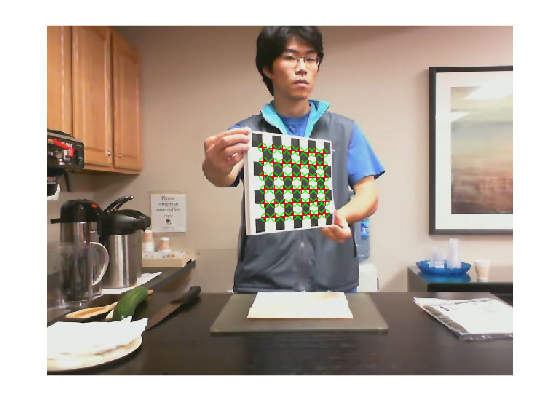

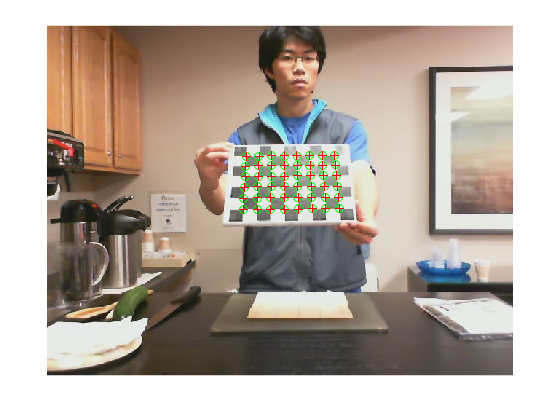

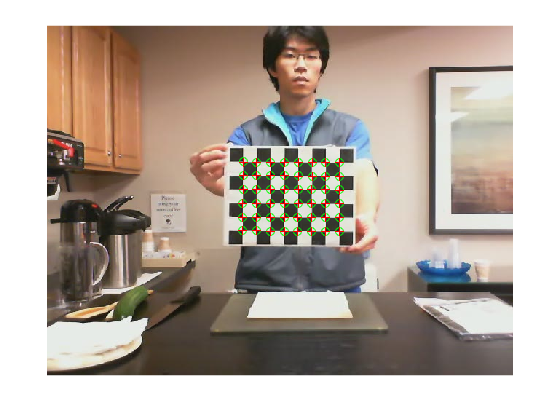

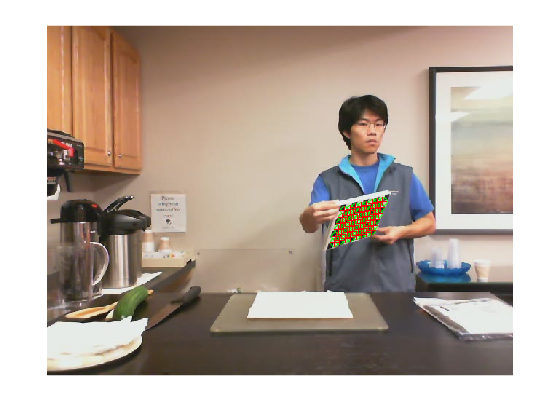

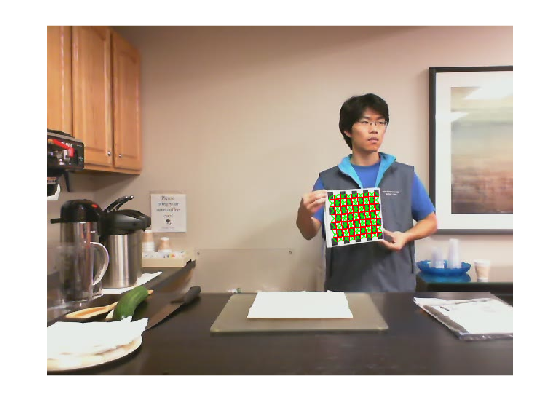

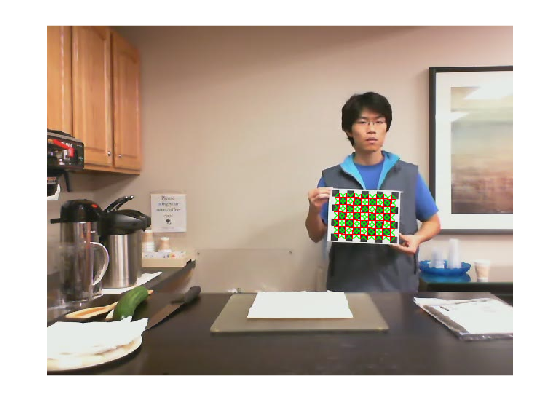

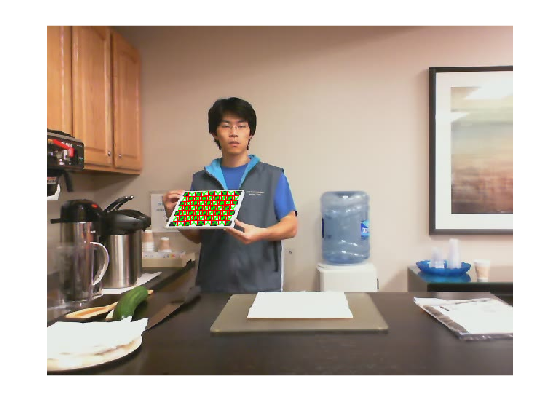

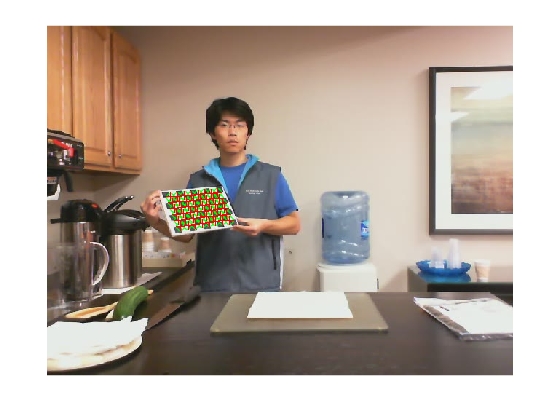

In [40]:
% draw detected corners
j = 1;
for i=1:numel(leftImagesUsed)
    if leftImagesUsed(i) == 1
        figure;
        imshow(leftImages.readimage(i));
        hold on;
        plot(leftImagePoints(:,1,j), leftImagePoints(:,2,j),'go');
        plot(leftCamParams.ReprojectedPoints(:,1,j), ...
                leftCamParams.ReprojectedPoints(:,2,j),'r+');
        j = j + 1;
    end
end

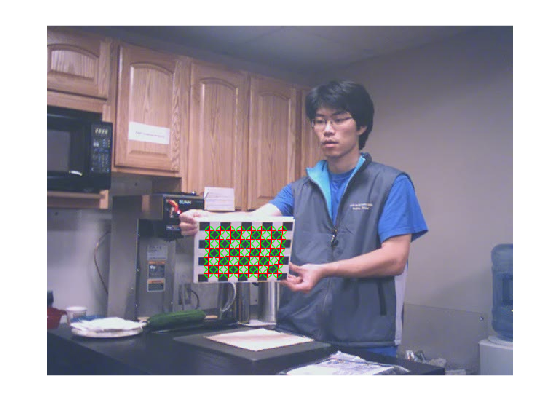

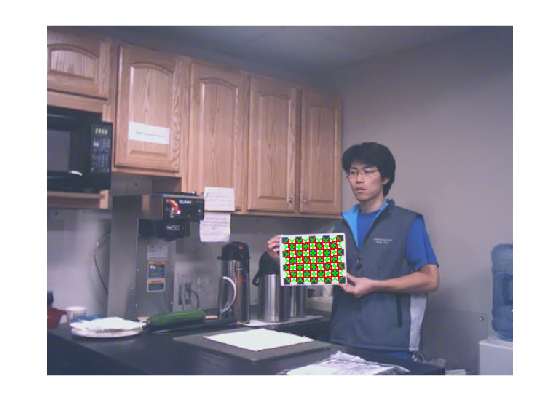

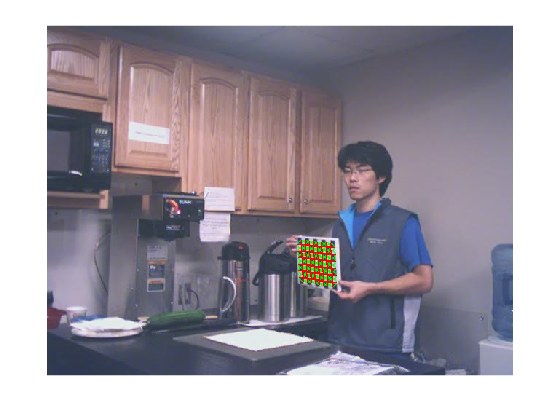

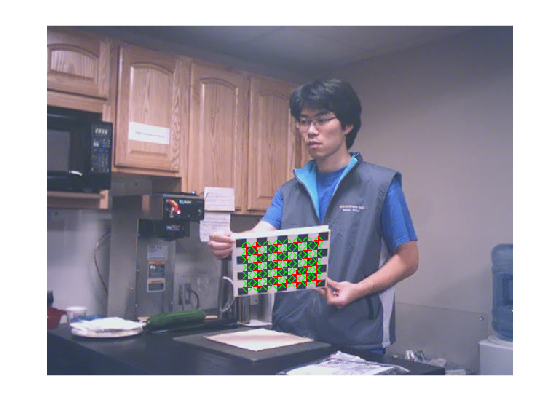

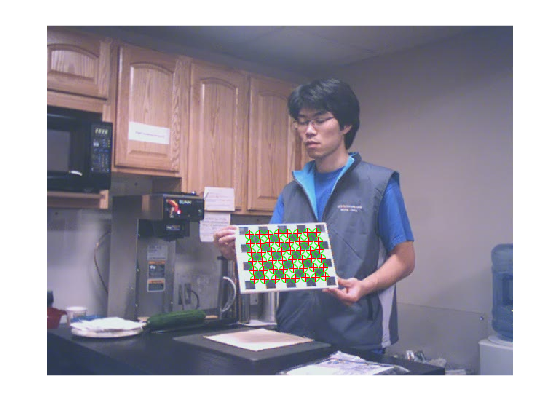

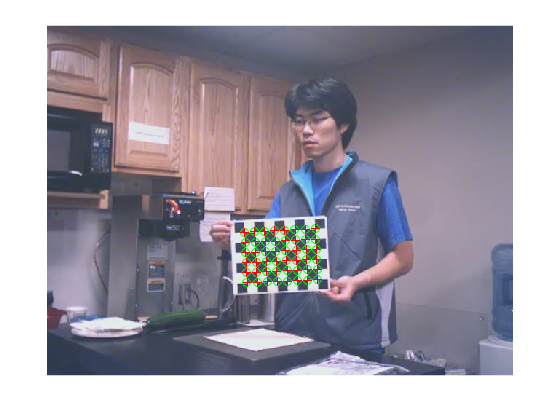

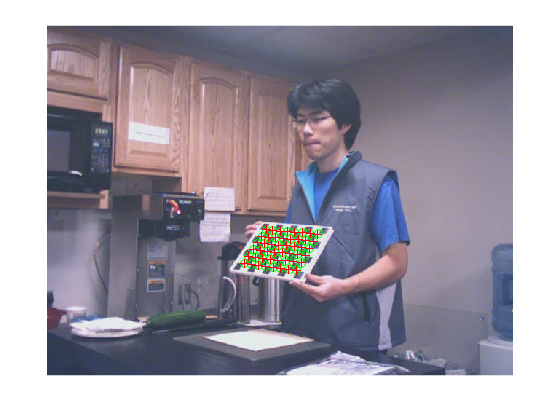

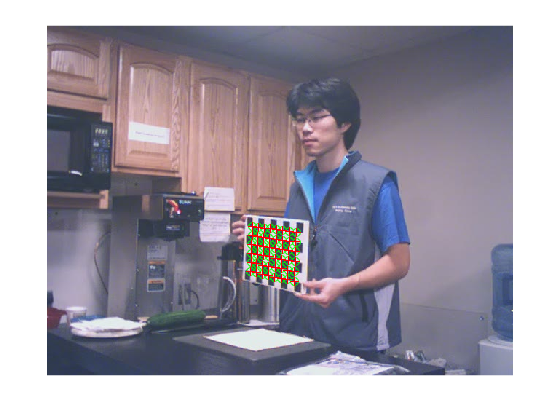

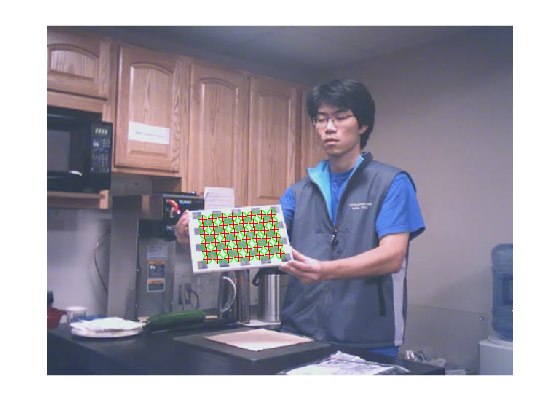

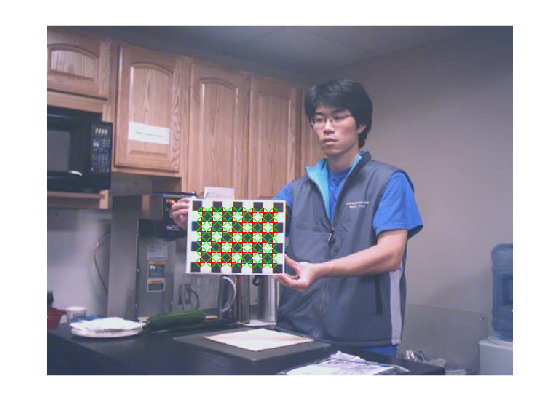

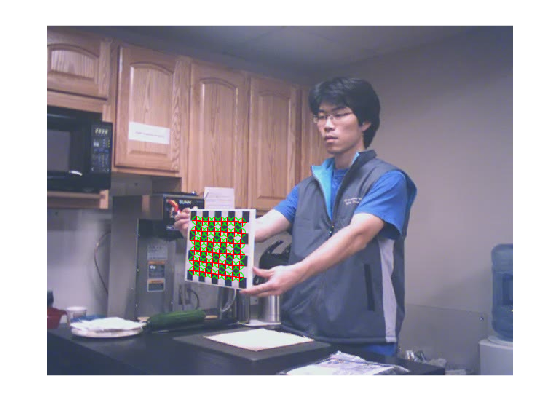

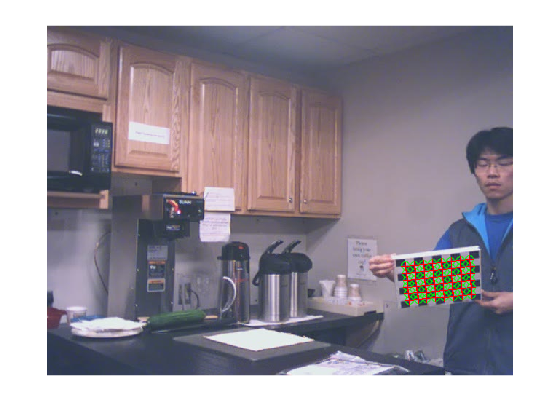

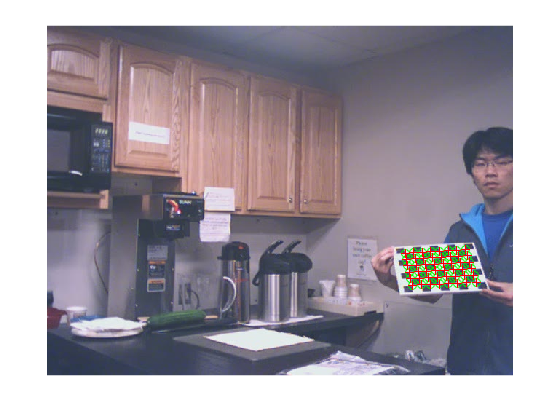

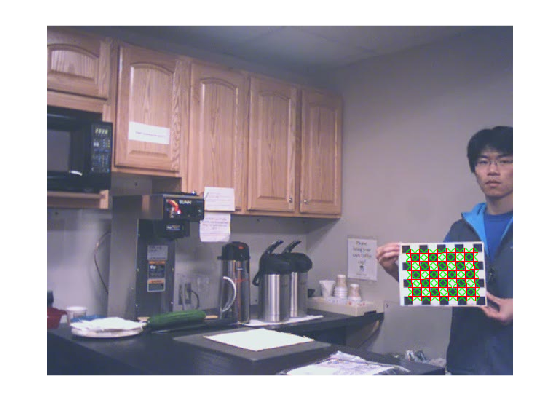

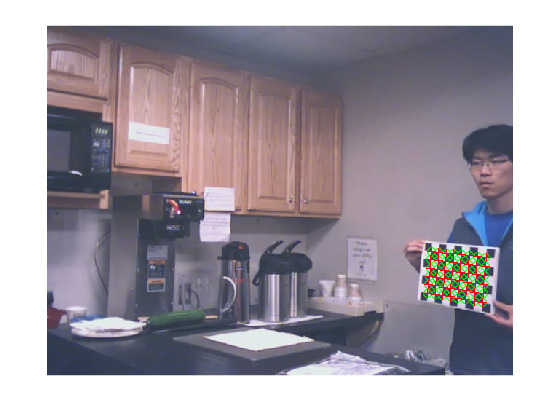

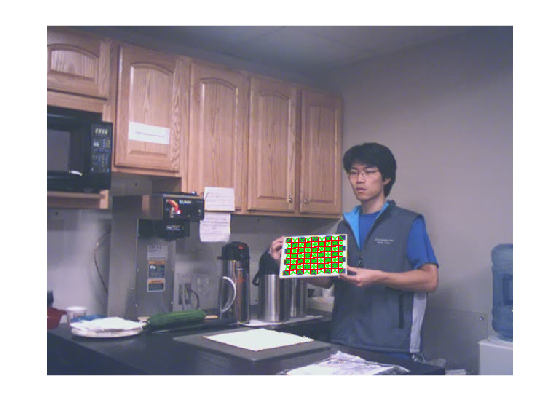

In [41]:
% draw detected corners
j = 1;
for i=1:numel(rightImagesUsed)
    if rightImagesUsed(i) == 1
        figure;
        imshow(rightImages.readimage(i));
        hold on;
        plot(rightImagePoints(:,1,j), rightImagePoints(:,2,j),'go');
        plot(rightCamParams.ReprojectedPoints(:,1,j), ...
                rightCamParams.ReprojectedPoints(:,2,j),'r+');
        j = j + 1;
    end
end

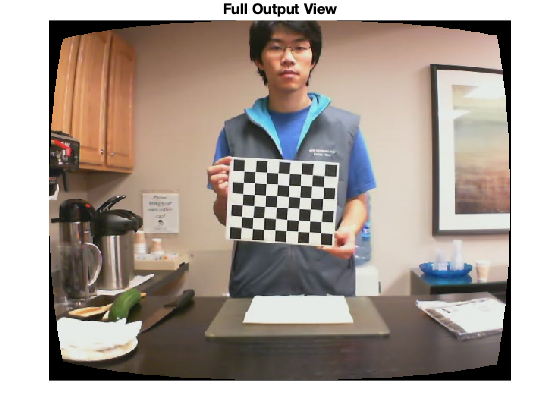

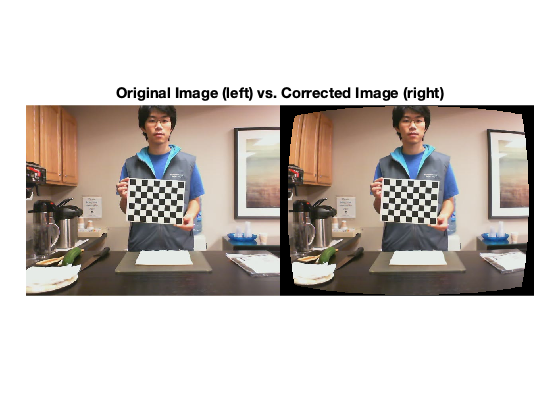

In [4]:
I = leftImages.readimage(1);
J1 = undistortImage(I, leftCamParams);
imshowpair(I, J1, 'montage');
title('Original Image (left) vs. Corrected Image (right)');

J2 = undistortImage(I, leftCamParams,'OutputView','full');
figure;
imshow(J2);
title('Full Output View');

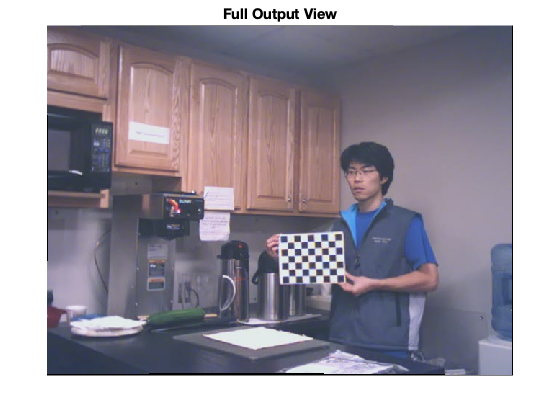

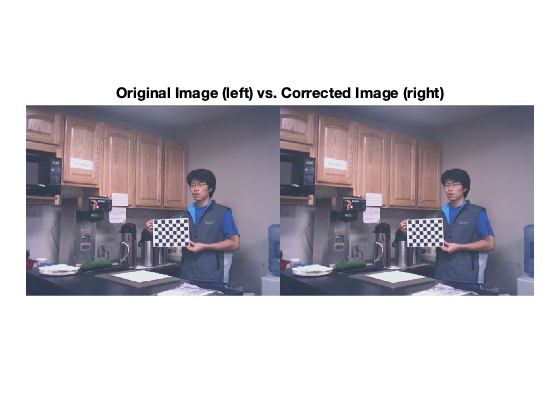

In [8]:
I = rightImages.readimage(7);
J1 = undistortImage(I, rightCamParams);
imshowpair(I, J1, 'montage');
title('Original Image (left) vs. Corrected Image (right)');

J2 = undistortImage(I, rightCamParams,'OutputView','full');
figure;
imshow(J2);
title('Full Output View');

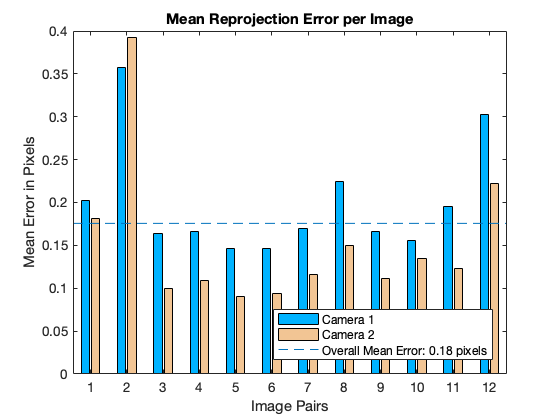

In [44]:
% stereo
[stereoImagePoints, boardSize] = ...
    detectCheckerboardPoints(leftImageFileNames, rightImageFileNames);
    
stereoWorldPoints = generateCheckerboardPoints(boardSize, squareSize);

camParams = estimateCameraParameters(stereoImagePoints, stereoWorldPoints, ...
                                  'ImageSize',imageSize);
                                  
showReprojectionErrors(camParams);

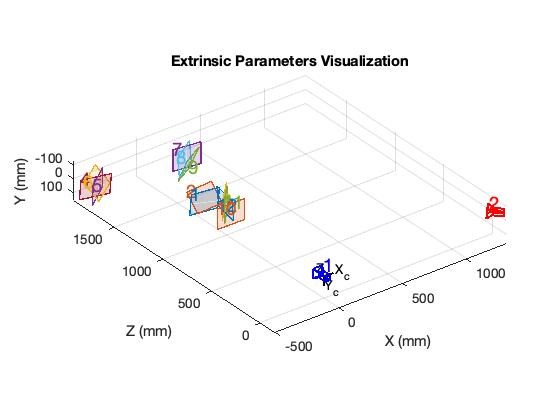

In [46]:
showExtrinsics(camParams);

In [51]:
disp(camParams.CameraParameters1);

  cameraParameters with properties:

   Camera Intrinsics
                    IntrinsicMatrix: [3x3 double]
                        FocalLength: [604.8649 605.1931]
                     PrincipalPoint: [337.3180 241.4758]
                               Skew: 0
                   RadialDistortion: [-0.1389 1.4218]
               TangentialDistortion: [0 0]
                          ImageSize: [480 640]

   Camera Extrinsics
                   RotationMatrices: [3x3x12 double]
                 TranslationVectors: [12x3 double]

   Accuracy of Estimation
              MeanReprojectionError: 0.1996
                 ReprojectionErrors: [48x2x12 double]
                  ReprojectedPoints: [48x2x12 double]

   Calibration Settings
                        NumPatterns: 12
                        WorldPoints: [48x2 double]
                         WorldUnits: 'mm'
                       EstimateSkew: 0
    NumRadialDistortionCoefficients: 2
       EstimateTangentialDistortion: 0



In [52]:
disp(camParams.CameraParameters2);

  cameraParameters with properties:

   Camera Intrinsics
                    IntrinsicMatrix: [3x3 double]
                        FocalLength: [792.3650 790.4706]
                     PrincipalPoint: [278.3921 221.1631]
                               Skew: 0
                   RadialDistortion: [-0.0262 0.0434]
               TangentialDistortion: [0 0]
                          ImageSize: [480 640]

   Camera Extrinsics
                   RotationMatrices: [3x3x12 double]
                 TranslationVectors: [12x3 double]

   Accuracy of Estimation
              MeanReprojectionError: 0.1518
                 ReprojectionErrors: [48x2x12 double]
                  ReprojectedPoints: [48x2x12 double]

   Calibration Settings
                        NumPatterns: 12
                        WorldPoints: [48x2 double]
                         WorldUnits: 'mm'
                       EstimateSkew: 0
    NumRadialDistortionCoefficients: 2
       EstimateTangentialDistortion: 0



> In images.internal.initSize (line 71)
  In imshow (line 332)


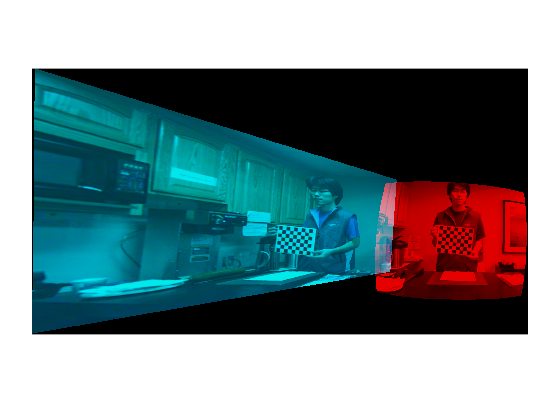

In [53]:
I1 = leftImages.readimage(1);
I2 = rightImages.readimage(1);

[J1_full, J2_full] = rectifyStereoImages(I1, I2, camParams, ...
                                            'OutputView','full');
imshow(stereoAnaglyph(J1_full,J2_full));

In [56]:
disp(camParams.RotationOfCamera2);

    0.6778   -0.0281   -0.7347
   -0.0437    0.9960   -0.0784
    0.7339    0.0853    0.6738

